# RECOPILACIÓN DE LO Q NOS DIO MEJOR RESULTADO (so far)

---
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, SVMSMOTE
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, auc, roc_auc_score, roc_curve, RocCurveDisplay, PrecisionRecallDisplay, plot_precision_recall_curve, plot_roc_curve

In [2]:
df_orig = pd.read_csv(r"DS_G3_HeartFailure_FULL_train.csv",index_col=0)
df_cleaned = df_orig.drop(["time","anaemia","diabetes","high_blood_pressure","sex","smoking"],axis=1)

feat_train, feat_test, targ_train, targ_test = train_test_split(df_cleaned.drop(["DEATH_EVENT"],axis=1),df_cleaned["DEATH_EVENT"],test_size=0.2)

feat_train, targ_train = SMOTE().fit_resample(feat_train, targ_train)

In [3]:
feat_train.shape

(264, 6)

---

In [14]:
hyperparam = {"n_estimators":[200,500,1000,2000],"min_samples_leaf":[2,5,10,20]}
rf_model = RandomForestClassifier()
rf_grilla = GridSearchCV(rf_model,hyperparam,cv=10,scoring="f1",n_jobs=-1)
rf_grilla.fit(feat_train,targ_train)
rf_model = rf_grilla.best_estimator_
print(rf_grilla.best_params_)
print("Grilla Best Score: {:.3f}".format(rf_grilla.best_score_))
rf_scoring = cross_val_score(rf_model, feat_train, targ_train,cv=10, scoring="f1")
print("Cross Validation Score: {:.3f} +/- {:.3f}".format(rf_scoring.mean(),rf_scoring.std()))

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [24]:
# VER Q DA IGUAL LOS HIPERPARAMETROS -> PREGUNTAR
rf_model = RandomForestClassifier()
rf_model.fit(feat_train,targ_train)

rf_scoring = cross_val_score(rf_model, feat_train, targ_train,cv=10, scoring="f1")
print("Cross Validation Score: {:.3f} +/- {:.3f}".format(rf_scoring.mean(),rf_scoring.std()))

Cross Validation Score: 0.817 +/- 0.086


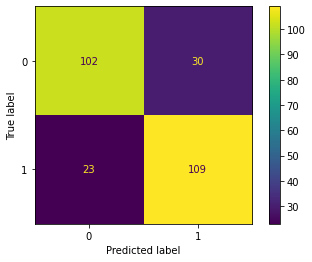

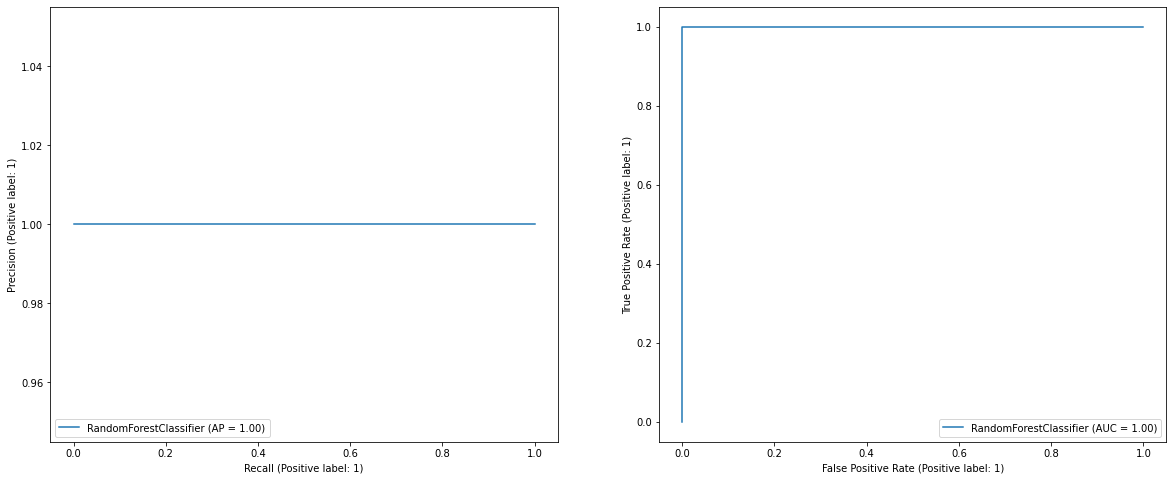

In [26]:
rf_predicted = cross_val_predict(rf_model,feat_train,targ_train,cv=10)
cm = confusion_matrix(targ_train, rf_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
plot_precision_recall_curve(rf_model, feat_train, targ_train,ax=ax1)
plot_roc_curve(rf_model, feat_train, targ_train,ax=ax2)

Test: 0.645


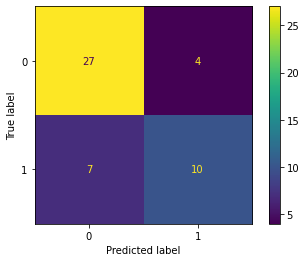

In [25]:
rf_predicted_t = rf_model.predict(feat_test)
cm = confusion_matrix(targ_test, rf_predicted_t)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
rf_scoring_t = f1_score(targ_test,rf_predicted_t)
print("Test: {:.3f}".format(rf_scoring_t))